In [11]:
from sklearn.datasets import fetch_openml
import numpy.random
import numpy as np
from collections import Counter
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)
data = mnist['data']
labels = mnist['target']

In [5]:
idx = numpy.random.RandomState(0).choice(70000, 11000)
train = data[idx[:10000], :].astype(int)
train_labels = labels[idx[:10000]]
test = data[idx[10000:], :].astype(int)
test_labels = labels[idx[10000:]]

In [9]:
def knn_predict(train_images, train_labels, query_image, k):
    """
    Predict the label of the query image using k-nearest neighbors.
    Part (A)
    """

    distances = np.linalg.norm(train_images - query_image, axis=1)
    k_indices = np.argsort(distances)[:k]
    k_labels = [train_labels[i] for i in k_indices]
    most_common = Counter(k_labels).most_common(1)[0][0]

    return most_common

# ----------------------------
# Accuracy Helper
# ----------------------------

def compute_accuracy(train_imgs, train_lbls, test_imgs, test_lbls, k):
    correct = 0
    for i in range(len(test_imgs)):
        pred = knn_predict(train_imgs, train_lbls, test_imgs[i], k)
        if pred == test_lbls[i]:
            correct += 1
    return correct / len(test_imgs)

In [10]:

# ----------------------------
# Part (b): k = 10, n = 1000
# ----------------------------
print("Running part (b)...")
acc_b = compute_accuracy(train[:1000], train_labels[:1000], test[:100], test_labels[:100], k=10)
print(f"Part (b) accuracy with k=10, n=1000: {acc_b:.4f}")


Running part (b)...
Part (b) accuracy with k=10, n=1000: 0.8200


A completely random predictor has no knowledge of the data and simply guesses a digit between 0 and 9 uniformly at random for each test image. Since there are 10 possible digit classes, the probability of randomly guessing the correct label is:
1/10, 10 %
This sets a baseline accuracy: any model that performs better than 10% is doing better than random chance. Our k-NN model performs significantly better than this, even with a small training set, which confirms that it’s capturing meaningful patterns in the data.

Running part (c)...


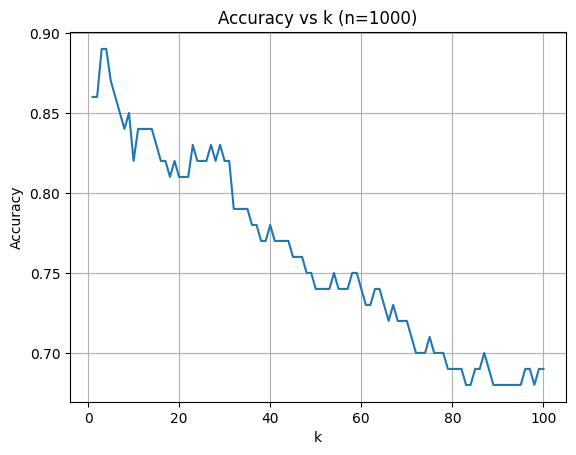

Best k: 3 with accuracy 0.8900


In [12]:

# ----------------------------
# Part (c): Accuracy vs. k
# ----------------------------
print("Running part (c)...")
k_vals = range(1, 101)
acc_k = []
for k in k_vals:
    acc = compute_accuracy(train[:1000], train_labels[:1000], test[:100], test_labels[:100], k)
    acc_k.append(acc)

plt.plot(k_vals, acc_k)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (n=1000)")
plt.grid(True)
plt.show()

best_k = k_vals[np.argmax(acc_k)]
print(f"Best k: {best_k} with accuracy {max(acc_k):.4f}")


Thus, the best k is a balance: large enough to smooth out noise, but small enough to avoid averaging across unrelated classes.

Running part (d)...


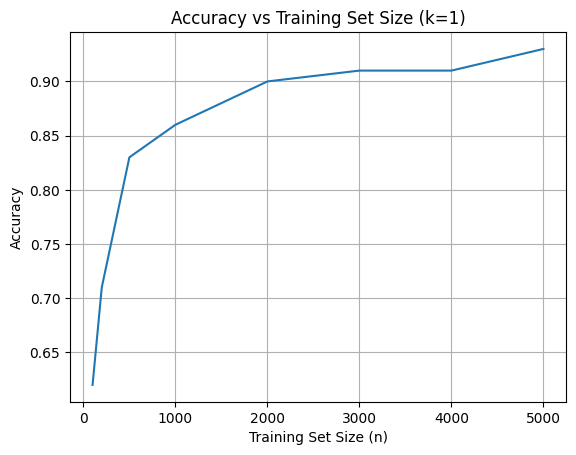

In [13]:
# ----------------------------
# Part (d): Accuracy vs. n
# ----------------------------
print("Running part (d)...")
train_sizes = [100, 200, 500, 1000, 2000, 3000, 4000, 5000]
acc_n = []
for size in train_sizes:
    acc = compute_accuracy(train[:size], train_labels[:size], test[:100], test_labels[:100], k=1)
    acc_n.append(acc)

plt.plot(train_sizes, acc_n)
plt.xlabel("Training Set Size (n)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Set Size (k=1)")
plt.grid(True)
plt.show()

In the experiment where we fixed k = 1 and increased the training set size, the model’s accuracy consistently improved with more training examples. This is expected behavior:
	•	With more training images, the chance of finding a very similar neighbor increases, especially for ambiguous or poorly written digits.
	•	The biggest accuracy gains occurred in the early stages (e.g., from 100 to 1000 examples).
	•	After a certain point (around 3000–5000), accuracy gains start to plateau — this is known as diminishing returns.

These results highlight one of the strengths of k-NN: it benefits directly from having more data, since it simply “remembers” examples. However, it also shows that scaling up k-NN becomes computationally expensive as training data grows, because predictions require computing distances to all training examples.
